Measured fraction alive [0.82055989 0.84988558 0.88056959 0.90946502 0.92427719 0.94031221
 0.95726103 0.9760479  0.9797515  0.98107983 0.98111469]
------Non paralyzable model-----
fraction alive predicted by non paralyzable model [0.87082402 0.88440904 0.89984428 0.91597256 0.92498641 0.93396004
 0.94324643 0.95286057 0.95689611 0.96333485 0.96816486]
the fitted del dead time is 12.246074422904817  us

-----paralyzable model-----
fraction alive predicted by the paralyzable model [0.87556434 0.88741297 0.90110445 0.91561872 0.92386134 0.93212327
 0.94075131 0.94976848 0.95358927 0.95975496 0.9643938 ]
the fitted del dead time is 14.321386984412026  us


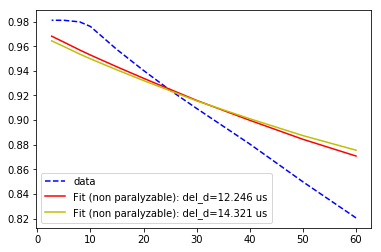

In [83]:
# Anni Xiong
# program for fitting to the dead time models using scipy curve fit

import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

# Non paralyzable model dead time equations:
# 1 - measured_rate * dead time = measured rate / true rate = fraction alive

# we are fitting to the model:
# 1 - measured rate * (dead time + del_d) = fraction alive
# or
# measured rate(x) * del_d = 1- fraction alive - measured rate * veto
# in which we want to get del_d as the fitting parameter

# customized function to be used for fitting
def func (x, del_d):
    return x * del_d

# Data from measurements
veto_in_us = np.array([60, 50, 40, 30, 25, 20, 15, 10, 8 , 5, 2.7])
veto_in_s = veto_in_us * 1e-6
scaler_total_cr = np.array([2179, 2185, 2177, 2187, 2179, 2178, 2176, 2171, 2173, 2167, 2171])
mea_rate = np.array([1788, 1857, 1917, 1989, 2014, 2048, 2083, 2119, 2129, 2126, 2130])
frac_alive_trig = mea_rate / scaler_total_cr

y_non_para = 1- veto_in_s *mea_rate- frac_alive_trig
y_para = -mea_rate*veto_in_s - np.log(frac_alive_trig)

# returning the fitting parameters with the non-paralyzable model 
popt, pcov = curve_fit (func, mea_rate, y_non_para)
# returning the fitting parameters with the paralyzable model parameters
popt_p, pcov_p = curve_fit (func, mea_rate, y_para)

print ("Measured fraction alive", frac_alive_trig)
print ("------Non paralyzable model-----")
print ("fraction alive predicted by non paralyzable model", 1- veto_in_s* mea_rate - mea_rate* (1.22460744229e-05))
print ("the fitted del dead time is", popt[0]*10e+5," us")
print ("");
print ("-----paralyzable model-----")
print ("fraction alive predicted by the paralyzable model", np.exp(-mea_rate* (veto_in_s + 1.432139e-05)))
print ("the fitted del dead time is", popt_p[0]*10e+5," us")

# plotting
fig, ax = plt.subplots ()
ax.plot(veto_in_us, frac_alive_trig, 'b--', label = 'data')
ax.plot(veto_in_us, 1- veto_in_s* mea_rate - mea_rate* popt[0], 'r-', label='Fit (non paralyzable): del_d=%5.3f us' % (popt[0]*1000000))
ax.plot(veto_in_us, np.exp(-mea_rate* (veto_in_s + popt_p[0])), 'y-', label='Fit (non paralyzable): del_d=%5.3f us' % (popt_p[0]*1000000))
ax.legend()
plt.show ()
#plt.savefig('dead_time_fitting.png')